In [1]:
# new jupyter project notebook file
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import data file
data_file = Path("Resources/diabetes_binary_health_indicators_BRFSS2015.csv")

In [25]:
#look at datafile
data_file_df = pd.read_csv(data_file)
data_file_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [26]:
#To check for the Duplicate value
duplicate_values = data_file_df.duplicated().sum()
duplicate_values
#duplicate values was 24206
len(data_file_df)
#total count =253680


253680

In [28]:
# To remove the duplicated values
data_file_df.drop_duplicates(inplace = True)
len(data_file_df)

229474

In [29]:
#show datatypes
data_file_df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [30]:
#show subset of columns to analyse
diabetes_age_sex_bmi = data_file_df[["Diabetes_binary", "BMI","Sex","Age"]]
diabetes_age_sex_bmi.head(10)

,Diabetes_binary,BMI,Sex,Age
0,0.0,40.0,0.0,9.0
1,0.0,25.0,0.0,7.0
2,0.0,28.0,0.0,9.0
3,0.0,27.0,0.0,11.0
4,0.0,24.0,0.0,11.0
5,0.0,25.0,1.0,10.0
6,0.0,30.0,0.0,9.0
7,0.0,25.0,0.0,11.0
8,1.0,30.0,0.0,9.0
9,0.0,24.0,1.0,8.0


In [31]:
#GROUP BMI into buckets

df1=diabetes_age_sex_bmi
#set range for BMI
bins = [0,18,25,30,100]
#name the ranges
group_names=['Underweight','Healthy','Overweight','Obese']
#new column
df1['BMI_GROUP']=pd.cut(diabetes_age_sex_bmi['BMI'],bins,labels=group_names)

df1.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_37428\2164732836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BMI_GROUP']=pd.cut(diabetes_age_sex_bmi['BMI'],bins,labels=group_names)


,Diabetes_binary,BMI,Sex,Age,BMI_GROUP
0,0.0,40.0,0.0,9.0,Obese
1,0.0,25.0,0.0,7.0,Healthy
2,0.0,28.0,0.0,9.0,Overweight
3,0.0,27.0,0.0,11.0,Overweight
4,0.0,24.0,0.0,11.0,Healthy
5,0.0,25.0,1.0,10.0,Healthy
6,0.0,30.0,0.0,9.0,Overweight
7,0.0,25.0,0.0,11.0,Healthy
8,1.0,30.0,0.0,9.0,Overweight
9,0.0,24.0,1.0,8.0,Healthy


In [49]:
#GROUP Age into buckets

df2=df1

#set range for Age
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#name the ranges
group_names=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
#new column
df1['Age_GROUP']=pd.cut(df1['Age'],bins,labels=group_names)

df2.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_37428\4108418551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_GROUP']=pd.cut(df1['Age'],bins,labels=group_names)


,Diabetes_binary,BMI,Sex,Age,BMI_GROUP,Age_GROUP
0,0.0,40.0,0.0,9.0,Obese,60-64
1,0.0,25.0,0.0,7.0,Healthy,50-54
2,0.0,28.0,0.0,9.0,Overweight,60-64
3,0.0,27.0,0.0,11.0,Overweight,70-74
4,0.0,24.0,0.0,11.0,Healthy,70-74
5,0.0,25.0,1.0,10.0,Healthy,65-69
6,0.0,30.0,0.0,9.0,Overweight,60-64
7,0.0,25.0,0.0,11.0,Healthy,70-74
8,1.0,30.0,0.0,9.0,Overweight,60-64
9,0.0,24.0,1.0,8.0,Healthy,55-59


In [51]:
#set bmi_group as index
# df_bmi = df2.set_index("BMI_GROUP")
df_bmi = df2.reindex()
df_bmi.head()

,Diabetes_binary,BMI,Sex,Age,BMI_GROUP,Age_GROUP
0,0.0,40.0,0.0,9.0,Obese,60-64
1,0.0,25.0,0.0,7.0,Healthy,50-54
2,0.0,28.0,0.0,9.0,Overweight,60-64
3,0.0,27.0,0.0,11.0,Overweight,70-74
4,0.0,24.0,0.0,11.0,Healthy,70-74


In [56]:
#format to age by diabetes
df_bmi_plot = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]].head(100)
df_bmi_plot

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
1,50-54,Healthy,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
4,70-74,Healthy,0.0
...,...,...,...
95,60-64,Healthy,1.0
96,30-34,Obese,1.0
97,60-64,Obese,0.0
98,70-74,Overweight,0.0


In [67]:
#filter to only diabetics
df_bmi_plot_diabetics = df_bmi.loc[df_bmi['Diabetes_binary'] == 1]
# df_bmi_plot_ = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]].head(100)
df_bmi_plot_diabetics = df_bmi_plot_diabetics.loc[:, ["Age_GROUP","Diabetes_binary"]]
df_bmi_plot_diabetics

,Age_GROUP,Diabetes_binary
8,60-64,1.0
10,80+,1.0
13,70-74,1.0
17,50-54,1.0
23,80+,1.0
...,...,...
253659,45-49,1.0
253668,65-69,1.0
253670,80+,1.0
253676,70-74,1.0


In [71]:
diabetics_by_age = df_bmi_plot_diabetics.groupby('Age_GROUP')

# Count how many times each road type appears in our group
count_diabetics = diabetics_by_age['Age_GROUP'].count()

count_diabetics

Age_GROUP
18-24      78
25-29     140
30-34     314
35-39     625
40-44    1049
45-49    1741
50-54    3072
55-59    4241
60-64    5681
65-69    6483
70-74    5090
75-79    3383
80+      3200
Name: Age_GROUP, dtype: int64

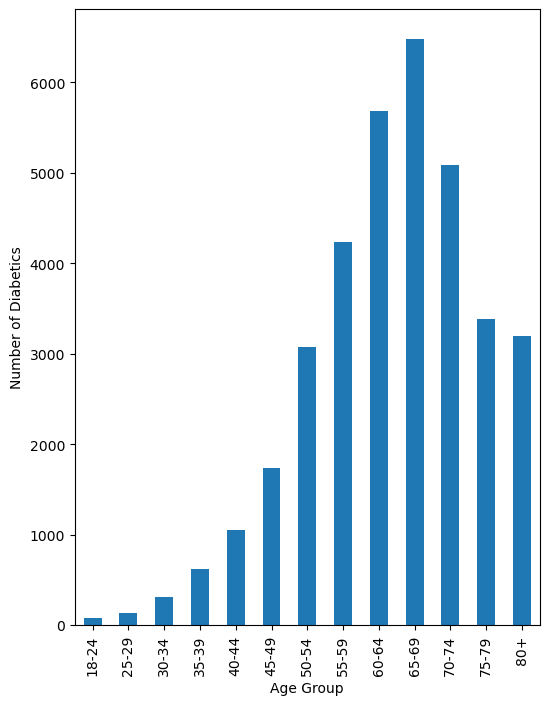

<Figure size 640x480 with 0 Axes>

In [72]:
# Create a bar chart based off of the group series from before
count_chart = count_diabetics.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Age Group")
count_chart.set_ylabel("Number of Diabetics")

plt.show()
plt.tight_layout()